In [1]:
import urllib.request
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import re

In [2]:
from PIL import Image
from io import BytesIO
from nltk.tokenize import RegexpTokenizer
import nltk
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import cosine_similarity

C:\ProgramData\Anaconda3\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [3]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/09.%20Word%20Embedding/dataset/data.csv", filename="DataSet/Book_Data.csv")

('DataSet/Book_Data.csv', <http.client.HTTPMessage at 0x4c5b9190>)

In [4]:
df = pd.read_csv("DataSet/Book_Data.csv")

In [5]:
print('Count of lists(documents): ',len(df))

Count of lists(documents):  2382


In [6]:
df[:5]

Unnamed: 0                                               Desc  \
0           0  We know that power is shifting: From West to E...   
1           1  Following the success of The Accidental Billio...   
2           2  How to tap the power of social software and ne...   
3           3  William J. Bernstein is an American financial ...   
4           4  Amazing book. And I joined Steve Jobs and many...   

   Unnamed: 0.1                author     genre  \
0           0.0           Moisés Naím  Business   
1           1.0       Blake J. Harris  Business   
2           2.0          Chris Brogan  Business   
3           3.0  William J. Bernstein  Business   
4           4.0           Akio Morita  Business   

                                          image_link  rating  \
0  https://i.gr-assets.com/images/S/compressed.ph...    3.63   
1  https://i.gr-assets.com/images/S/compressed.ph...    3.94   
2  https://i.gr-assets.com/images/S/compressed.ph...    3.78   
3  https://i.gr-assets.com/images/S/compressed.ph...    4.20   
4  https://i.gr-assets.com/images/S/compressed.ph...    4.05   

                                               title  
0  The End of Power: From Boardrooms to Battlefie...  
1  Console Wars: Sega, Nintendo, and the Battle t...  
2  Trust Agents: Using the Web to Build Influence...  
3                      The Four Pillars of Investing  
4                Made in Japan: Akio Morita and Sony

In [7]:
def _removeNonAscii(s) :
    return "".join(i for i in s if ord(i)<128)

In [8]:
def romove_stop_words(text) :
    text = text.split()
    stops = set(stopwords.words("english"))
    text = [w for w in text if not w in stops]
    text = " ".join(text)
    
    return text

In [9]:
def remove_html(text) :
    html_pattern = re.compile("<.*?>")
    
    return html_pattern.sub('', text)

In [10]:
def remove_punctuation(text) :
    tokenizer = RegexpTokenizer(r"[a-zA-Z]+")
    text = tokenizer.tokenize(text)
    text = " ".join(text)
    
    return text

In [11]:
df["cleaned"] = df["Desc"].apply(_removeNonAscii)
df["cleaned"] = df.cleaned.apply(lambda x: x.lower())
df["cleaned"] = df.cleaned.apply(romove_stop_words)
df["cleaned"] = df.cleaned.apply(remove_punctuation)
df["cleaned"] = df.cleaned.apply(remove_html)

In [12]:
df["cleaned"][:5]

0    know power shifting west east north south pres...
1    following success accidental billionaires mone...
2    tap power social software networks build busin...
3    william j bernstein american financial theoris...
4    amazing book joined steve jobs many akio morit...
Name: cleaned, dtype: object

In [13]:
df['cleaned'].replace('', np.nan, inplace=True)
df = df[df["cleaned"].notna()]
print('Count of lists(documents): ',len(df))

Count of lists(documents):  2381


In [14]:
corpus = []
for words in df["cleaned"] :
    corpus.append(words.split())

In [15]:
print(df)
print(corpus)

      Unnamed: 0                                               Desc  \
0              0  We know that power is shifting: From West to E...   
1              1  Following the success of The Accidental Billio...   
2              2  How to tap the power of social software and ne...   
3              3  William J. Bernstein is an American financial ...   
4              4  Amazing book. And I joined Steve Jobs and many...   
...          ...                                                ...   
2377        2446  Ralph Roberts, a sus setenta años y tras la mu...   
2378        2447  Murder at the Vicarage marks the debut of Agat...   
2379        2448  In 1951 John Wyndham published his novel The D...   
2380        2449  This now classic book revealed Flannery O'Conn...   
2381        2450  Imbued on every page with Frank McCourt's asto...   

      Unnamed: 0.1                author        genre  \
0              0.0           Moisés Naím     Business   
1              1.0       Blake J.

In [16]:
word2vec_model = Word2Vec(size = 300, window = 5, min_count = 2, workers = -1) #size = vector_size
word2vec_model.build_vocab(corpus)

In [17]:
word2vec_model.intersect_word2vec_format("F:/Study/DataSet/GoogleNews-vectors-negative300.bin", lockf=1.0, binary=True)
word2vec_model.train(corpus, total_examples = word2vec_model.corpus_count, epochs = 15)

(0, 0)

In [18]:
print(word2vec_model.wv.vocab)

{'know': <gensim.models.keyedvectors.Vocab object at 0x000000004E9B2B50>, 'power': <gensim.models.keyedvectors.Vocab object at 0x000000004E9B2220>, 'shifting': <gensim.models.keyedvectors.Vocab object at 0x000000004E9B2C10>, 'west': <gensim.models.keyedvectors.Vocab object at 0x000000004E9B2F40>, 'east': <gensim.models.keyedvectors.Vocab object at 0x000000004E9B2FA0>, 'north': <gensim.models.keyedvectors.Vocab object at 0x000000004E9B2D60>, 'south': <gensim.models.keyedvectors.Vocab object at 0x000000004E9B2400>, 'presidential': <gensim.models.keyedvectors.Vocab object at 0x000000004E9B2520>, 'palaces': <gensim.models.keyedvectors.Vocab object at 0x000000004E9B2640>, 'public': <gensim.models.keyedvectors.Vocab object at 0x000000004E9B7070>, 'squares': <gensim.models.keyedvectors.Vocab object at 0x000000004E9B70D0>, 'formidable': <gensim.models.keyedvectors.Vocab object at 0x000000004E9B7130>, 'corporate': <gensim.models.keyedvectors.Vocab object at 0x000000004E9B7190>, 'behemoths': <ge

In [25]:
#Average of word vectors
def get_documents_vectors(documents_list) :
    document_embedding_list = []
    
    for line in documents_list :
        doc2vec = None
        count = 0
        for word in line.split() :
            if word in word2vec_model.wv.vocab :
                count += 1
                
                if doc2vec is None :
                    doc2vec = word2vec_model[word]
                else :
                    doc2vec = doc2vec + word2vec_model[word]
                    
        if doc2vec is not None :
            doc2vec /= count
            document_embedding_list.append(doc2vec)
        
    return document_embedding_list

In [28]:
document_embedding_list = get_documents_vectors(df['cleaned'])
print(document_embedding_list[:3])

<ipython-input-25-6a70d3938356>:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  doc2vec = word2vec_model[word]
<ipython-input-25-6a70d3938356>:15: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  doc2vec = doc2vec + word2vec_model[word]


[array([ 0.01099237,  0.06244937,  0.00112539,  0.08351378, -0.04708962,
       -0.04962126,  0.02010091, -0.0466723 ,  0.07041101,  0.05588926,
       -0.02838993, -0.07865719, -0.02191651,  0.08063647, -0.08375337,
        0.05852875,  0.01613779,  0.06033041,  0.02781328, -0.04362275,
       -0.01277386,  0.00927649,  0.00162379,  0.02927583,  0.03991704,
       -0.0110793 , -0.08087862,  0.03558517,  0.02068066, -0.04982418,
       -0.02047638,  0.00595466, -0.04737717,  0.02202987,  0.0267623 ,
       -0.01322141, -0.00745325, -0.00287762,  0.05908879,  0.05253328,
        0.08114177, -0.02417813,  0.0736009 ,  0.01238326, -0.01675036,
       -0.03826409, -0.0280455 ,  0.03467045, -0.01046428,  0.02098857,
        0.00673575,  0.01294163, -0.03483025, -0.01099331, -0.04403074,
        0.04375667, -0.06388376, -0.11035559, -0.00611589, -0.07839086,
       -0.02820003,  0.03710753, -0.05592484, -0.08471426, -0.01676862,
       -0.01207237, -0.03206439,  0.11353653, -0.04324184,  0.0

In [27]:
print("Length of document vector: ",len(document_embedding_list))

Length of document vector:  2381


In [34]:
#Cosine_Similarity
cosine_similarities = cosine_similarity(document_embedding_list, document_embedding_list)
print("Shape of cosine similarities matrix : ",cosine_similarities.shape)
print(cosine_similarities)

Shape of cosine similarities matrix :  (2381, 2381)
[[0.9999999  0.8176335  0.7544944  ... 0.80088425 0.75259465 0.7070525 ]
 [0.8176335  0.9999998  0.66823626 ... 0.8088825  0.7878877  0.7578587 ]
 [0.7544944  0.66823626 1.0000001  ... 0.5733281  0.5561795  0.5420683 ]
 ...
 [0.80088425 0.8088825  0.5733281  ... 1.0000001  0.82354665 0.809144  ]
 [0.75259465 0.7878877  0.5561795  ... 0.82354665 0.9999999  0.8449127 ]
 [0.7070525  0.7578587  0.5420683  ... 0.809144   0.8449127  1.0000001 ]]


In [101]:
#recommendation function
def recommendations(title) :
    books = df[["title", "image_link"]]
    
    indices = pd.Series(df.index, index = df['title']).drop_duplicates()
    idx = indices[title]
    
    sim_scores = list(enumerate(cosine_similarities[idx]))

    sim_scores = sorted(sim_scores, key = lambda x: x[1], reverse = True)
    sim_scores = sim_scores[1:6]
    
    book_indices = [i[0] for i in sim_scores]
    #print(book_indices)
    
    recommend = books.iloc[book_indices].reset_index(drop=True)
    #print(recommend)
    #print("===================")
    
    fig = plt.figure(figsize=(20, 30))
    
    for index, row in recommend.iterrows():
        #print(index,"\n")
        #print(row,"\n")
        response = requests.get(row['image_link'])
        img = Image.open(BytesIO(response.content))
        fig.add_subplot(1, 5, index + 1)
        plt.imshow(img)
        plt.title(row['title'])

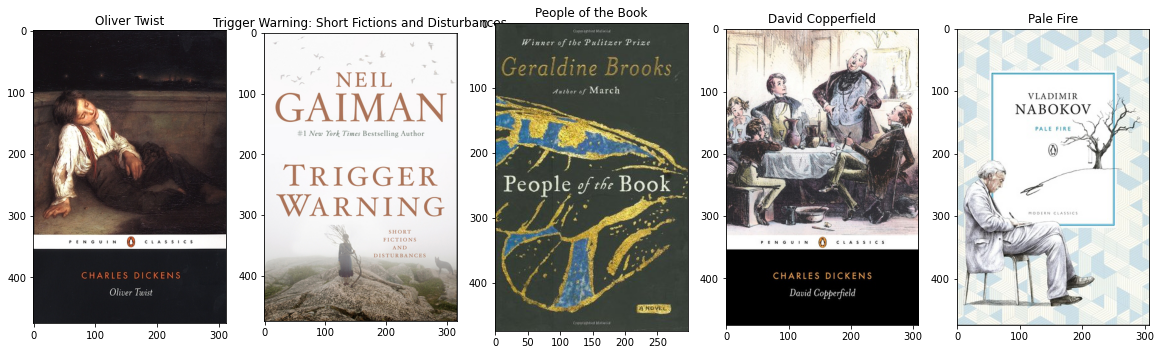

In [102]:
recommendations("Moby-Dick or, the Whale")

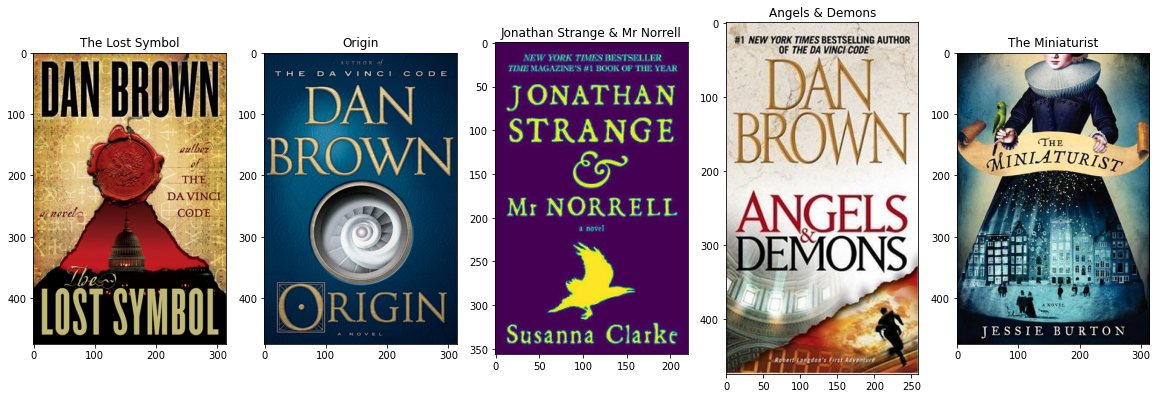

In [103]:
recommendations("The Da Vinci Code")